In [1]:
import os
import json
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re
import geopandas as gpd
import numpy as np
import plotly.express as px
from nltk import bigrams
from collections import Counter
from wordcloud import WordCloud



In [2]:
df = pd.read_csv('output.csv', encoding='ISO-8859-1') # to read datetime format correctly
print(df.head())

   datePosted  fullTime  partTime  minimumSalary  maximumSalary contractType  \
0  19/12/2019      True     False        17544.0        17544.0    Permanent   
1  19/12/2019      True     False        28000.0        35000.0    Permanent   
2  19/12/2019      True     False        18000.0        22000.0    Permanent   
3  19/12/2019      True     False           18.0           20.0     Contract   
4  19/12/2019      True     False            NaN            NaN    Permanent   

                       jobTitle  
0        Customer Sales Advisor  
1         General Radiographer   
2     Client Support Executive   
3  Electro Mechanical Inspector  
4                  Audit Senior  


In [3]:
#1.1
#total number of jobs posted

total_jobs= len(df)
print(f"Total Number of adverts are: {total_jobs}")

Total Number of adverts are: 2000007


In [4]:
#1.2

full_time_count = (df['fullTime'] == True).sum()
part_time_count = (df['partTime'] == True).sum()
other_jobs_count = ((df['fullTime'] == False) & (df['partTime'] == False)).sum()

print(f"Number of Full-Time Ads: {full_time_count}")
print(f"Number of Part-time Ads: {part_time_count}")
print(f"Number of other job ads: {other_jobs_count}")

Number of Full-Time Ads: 1719333
Number of Part-time Ads: 227636
Number of other job ads: 175321


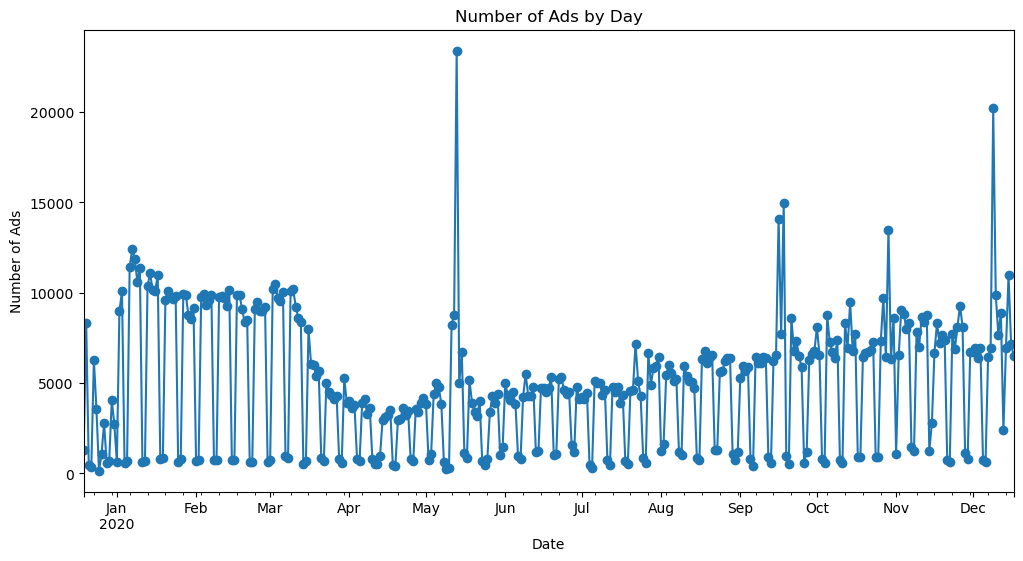

In [5]:
# 1.3

# convert 'datePosted' to datetime format
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)  # adjust this if the date format is not 'DD/MM/YYYY'

# group by date and count the number of ads
ads_per_day = df.groupby('datePosted').size()

# plot
plt.figure(figsize=(12, 6))
ads_per_day.plot(kind='line',marker='o', linestyle='-')
plt.title('Number of Ads by Day')
plt.xlabel('Date')
plt.ylabel('Number of Ads')
plt.show()

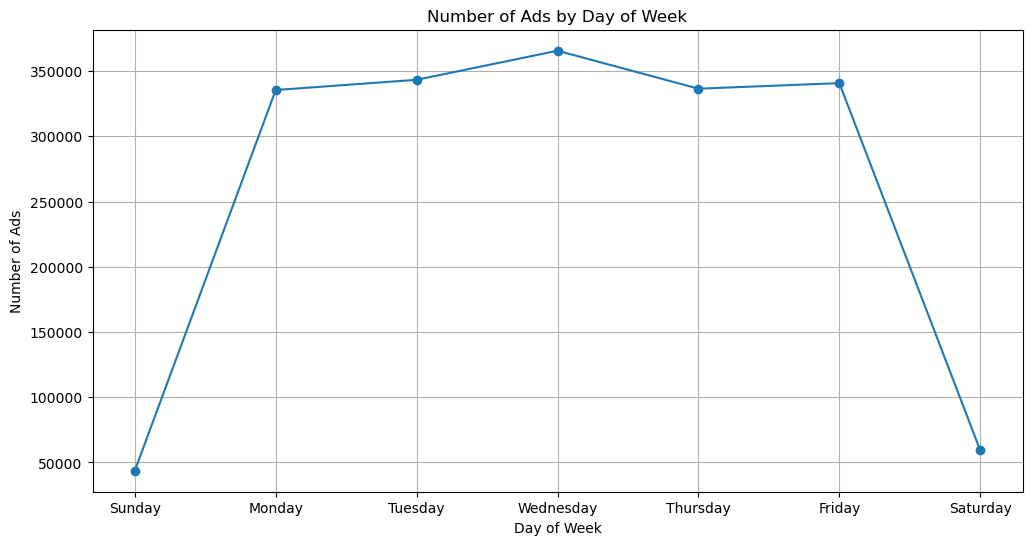

In [6]:
#1.3
# convert 'datePosted' to datetime format
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)

# create a new column for day of the week
df['dayOfWeek'] = df['datePosted'].dt.day_name()  # This gives the actual day names

# group by day of the week and count the number of ads
ads_per_day_of_week = df.groupby('dayOfWeek').size()

# plot
plt.figure(figsize=(12, 6))
ads_per_day_of_week = ads_per_day_of_week.reindex(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday' ])
ads_per_day_of_week.plot(kind='line',marker='o', linestyle='-')
plt.title('Number of Ads by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Ads')
plt.grid(True)
plt.xticks(range(7), ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()


In [7]:
# load data from the CSV file into a new DataFrame
Salary_df = pd.read_csv('salary.csv',encoding='ISO-8859-1')
Salary_df.head()

salary
0                 £17,544 per annum
1       £28,000 - £35,000 per annum
2  £18,000 - £22,000 per annum, OTE
3          £18.00 - £20.00 per hour
4                               NaN

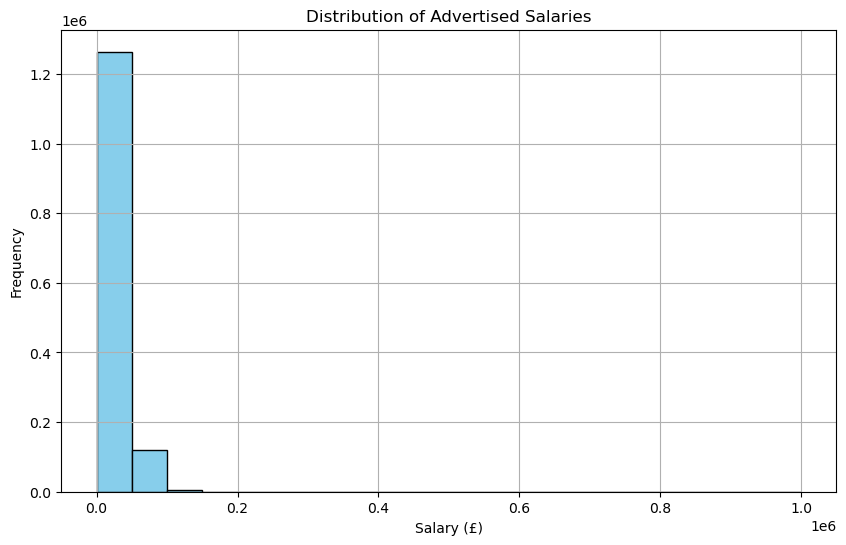

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load data from the CSV file into a new DataFrame
Salary_df = pd.read_csv('salary.csv', encoding='ISO-8859-1')

# Clean the data - remove pound symbol and per annum, and handle salary range
Salary_df['salary'] = Salary_df['salary'].str.replace('£', '').str.replace(' per annum', '').str.replace(' per hour', '')
Salary_df['salary'] = Salary_df['salary'].str.replace(',', '')

# Extract only numeric values from the 'salary' column using regular expressions
def extract_numeric_salary(x):
    numeric_values = re.findall(r'\d+', x)
    return float(numeric_values[0]) if numeric_values else None

Salary_df['salary'] = Salary_df['salary'].apply(lambda x: extract_numeric_salary(x) if isinstance(x, str) else x)

# Remove rows with non-numeric or empty values
Salary_df = Salary_df[Salary_df['salary'].notna()]

# Plot the distribution of advertised salaries
plt.figure(figsize=(10, 6))
plt.hist(Salary_df['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary (£)')
plt.ylabel('Frequency')
plt.title('Distribution of Advertised Salaries')
plt.grid(True)
plt.show()


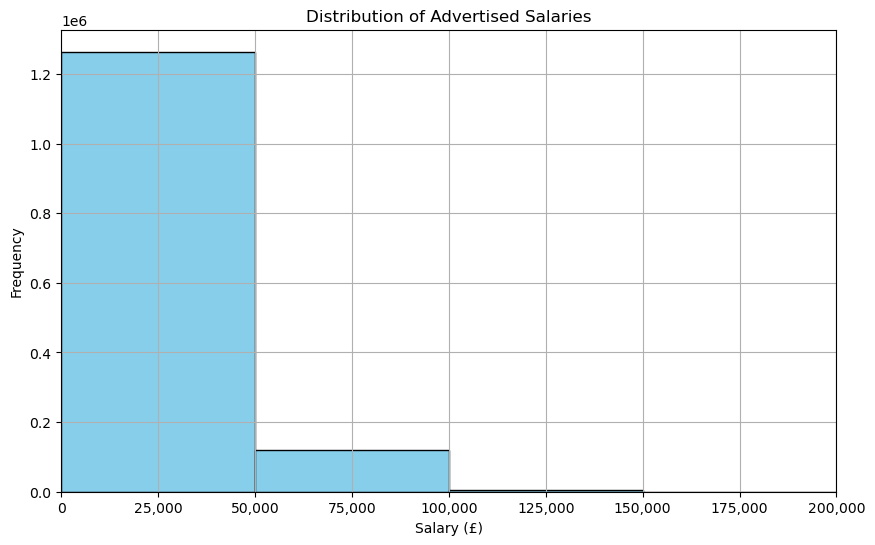

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import matplotlib.ticker as mticker

# Load data from the CSV file into a new DataFrame
Salary_df = pd.read_csv('salary.csv', encoding='ISO-8859-1')

# Clean the data - remove pound symbol and per annum, and handle salary range
Salary_df['salary'] = Salary_df['salary'].str.replace('£', '').str.replace(' per annum', '').str.replace(' per hour', '')
Salary_df['salary'] = Salary_df['salary'].str.replace(',', '')

# Extract only numeric values from the 'salary' column using regular expressions
def extract_numeric_salary(x):
    numeric_values = re.findall(r'\d+', x)
    return float(numeric_values[0]) if numeric_values else None

Salary_df['salary'] = Salary_df['salary'].apply(lambda x: extract_numeric_salary(x) if isinstance(x, str) else x)

# Remove rows with non-numeric or empty values
Salary_df = Salary_df[Salary_df['salary'].notna()]

# Convert salary values to integers
Salary_df['salary'] = Salary_df['salary'].astype(int)

# Plot the distribution of advertised salaries
plt.figure(figsize=(10, 6))
plt.hist(Salary_df['salary'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary (£)')
plt.ylabel('Frequency')
plt.title('Distribution of Advertised Salaries')
plt.grid(True)

# Customize x-axis tick labels with formatted integer values
plt.gca().xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Set the x-axis limits to 0 and 200000
plt.xlim(0, 200000)
plt.show()




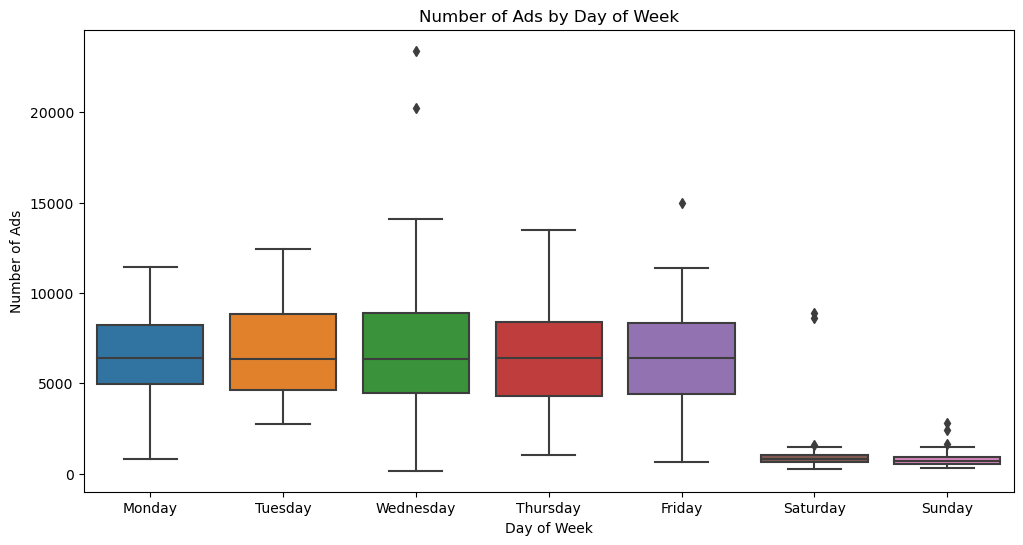

In [10]:
#1.5

# convert 'datePosted' to datetime format
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)

# create a new column for day of the week
df['dayOfWeek'] = df['datePosted'].dt.day_name()

# group by dayOfWeek and datePosted, then count the number of ads
ads_per_day = df.groupby(['dayOfWeek', 'datePosted']).size().reset_index(name='count')

# plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayOfWeek', y='count', data=ads_per_day,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Number of Ads by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Ads')
plt.show()

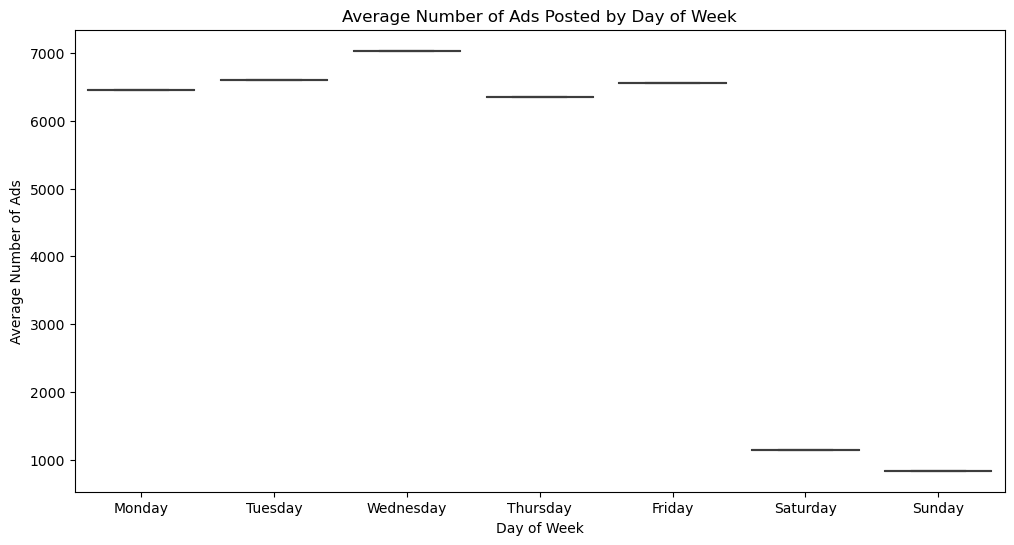

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded or created a DataFrame called 'df' with the 'datePosted' column in datetime format.

# create a new column for day of the week
df['dayOfWeek'] = df['datePosted'].dt.day_name()

# group by dayOfWeek and datePosted, then count the number of ads
ads_per_day = df.groupby(['dayOfWeek', 'datePosted']).size().reset_index(name='count')

# group by dayOfWeek and calculate the average number of ads per day
avg_ads_per_day = ads_per_day.groupby('dayOfWeek')['count'].mean().reset_index(name='average_count')

# plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='dayOfWeek', y='average_count', data=avg_ads_per_day,
            order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Number of Ads Posted by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Ads')
plt.show()


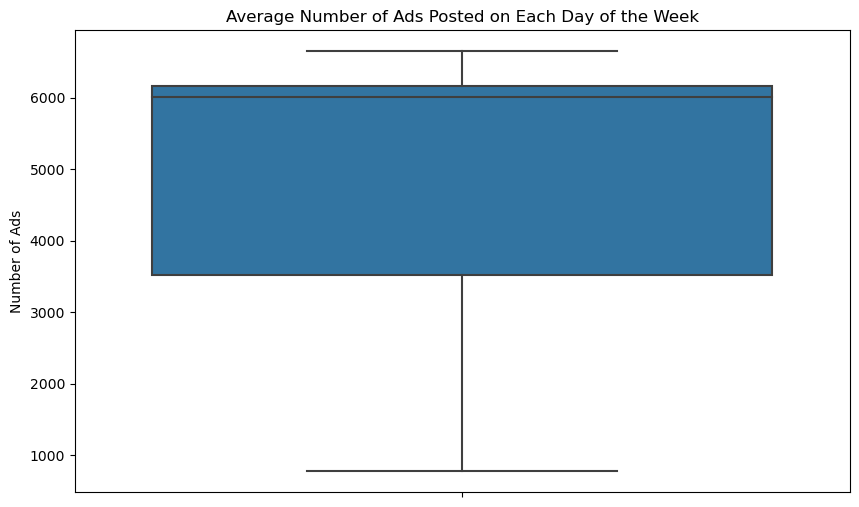

In [12]:
#1.5

import pandas as pd
import matplotlib.pyplot as plt

# Convert 'datePosted' to datetime format
df['datePosted'] = pd.to_datetime(df['datePosted'], dayfirst=True)

# Create a new column for the day of the week
df['dayOfWeek'] = df['datePosted'].dt.day_name()

# Count the number of ads per day of the week
days = df['dayOfWeek'].value_counts()

# Normalize counts
days.loc[["Tuesday", "Wednesday"]] /= 55
days.loc[~days.index.isin(["Tuesday", "Wednesday"])] /= 56

# Convert to DataFrame for seaborn compatibility
days_df = days.reset_index()
days_df.columns = ['dayOfWeek', 'numAds']

# Plot boxplot
plt.figure(figsize=(10,6))
sns.boxplot(y='numAds', data=days_df)
plt.title('Average Number of Ads Posted on Each Day of the Week')
plt.ylabel('Number of Ads')
plt.show()

In [13]:
# load data from the CSV file into a new DataFrame
Employer_df = pd.read_csv('Employer.csv',encoding='ISO-8859-1')
Employer_df.head()

datePosted                      jobTitle                      employerName
0  19/12/2019        Customer Sales Advisor                           Webhelp
1  19/12/2019         General Radiographer                   SYK  Recruitment
2  19/12/2019     Client Support Executive   Austin Clark Recruitment Limited
3  19/12/2019  Electro Mechanical Inspector                 Orion Electrotech
4  19/12/2019                  Audit Senior       Elevation Recruitment Group

In [14]:
#2.1
# group by 'employerName' and count the number of ads

top_employers = Employer_df['employerName'].value_counts().head(5)
print(top_employers)

REED                                   69006
Hays Specialist Recruitment Limited    67993
NHS Business Services Authority        61877
Partnership Jobs                       50947
Department of Work & Pensions          30904
Name: employerName, dtype: int64


In [15]:
#2.2

from nltk import bigrams
from collections import Counter
import pandas as pd

# Drop the rows with missing job titles
Employer_df = Employer_df.dropna(subset=['jobTitle'])

# Tokenize the job titles
job_title_words = Employer_df['jobTitle'].apply(lambda x: x.lower().split())

# Generate and count bigrams
bigram_counts = Counter()
for title in job_title_words:
    bigram_counts.update(bigrams(title))

# Print the 5 most common bigrams
for bigram, count in bigram_counts.most_common(5):
    print(f'{bigram}: {count}')


('care', 'assistant'): 61409
('support', 'worker'): 59803
('manager', '-'): 41275
('teaching', 'assistant'): 31121
('registered', 'nurse'): 29276


In [16]:
#2.2
# Define a function to clean and tokenize job titles

def tokenize_job_title(title):
    # Remove non-alphanumeric characters, convert to lower case and split into words
    return re.sub(r'[^a-zA-Z0-9\s]', '', title).lower().split()

# Clean and tokenize job titles in the DataFrame
Employer_df['jobTitleTokens'] = Employer_df['jobTitle'].dropna().apply(tokenize_job_title)

# Generate and count bigrams
bigram_counts = Counter()
for title in Employer_df['jobTitleTokens'].dropna():
    bigram_counts.update(zip(title, title[1:]))

# Print the 5 most common bigrams
for bigram, count in bigram_counts.most_common(5):
    print(f'{bigram}: {count}')

('care', 'assistant'): 61744
('support', 'worker'): 61153
('teaching', 'assistant'): 31978
('registered', 'nurse'): 29556
('customer', 'service'): 23590


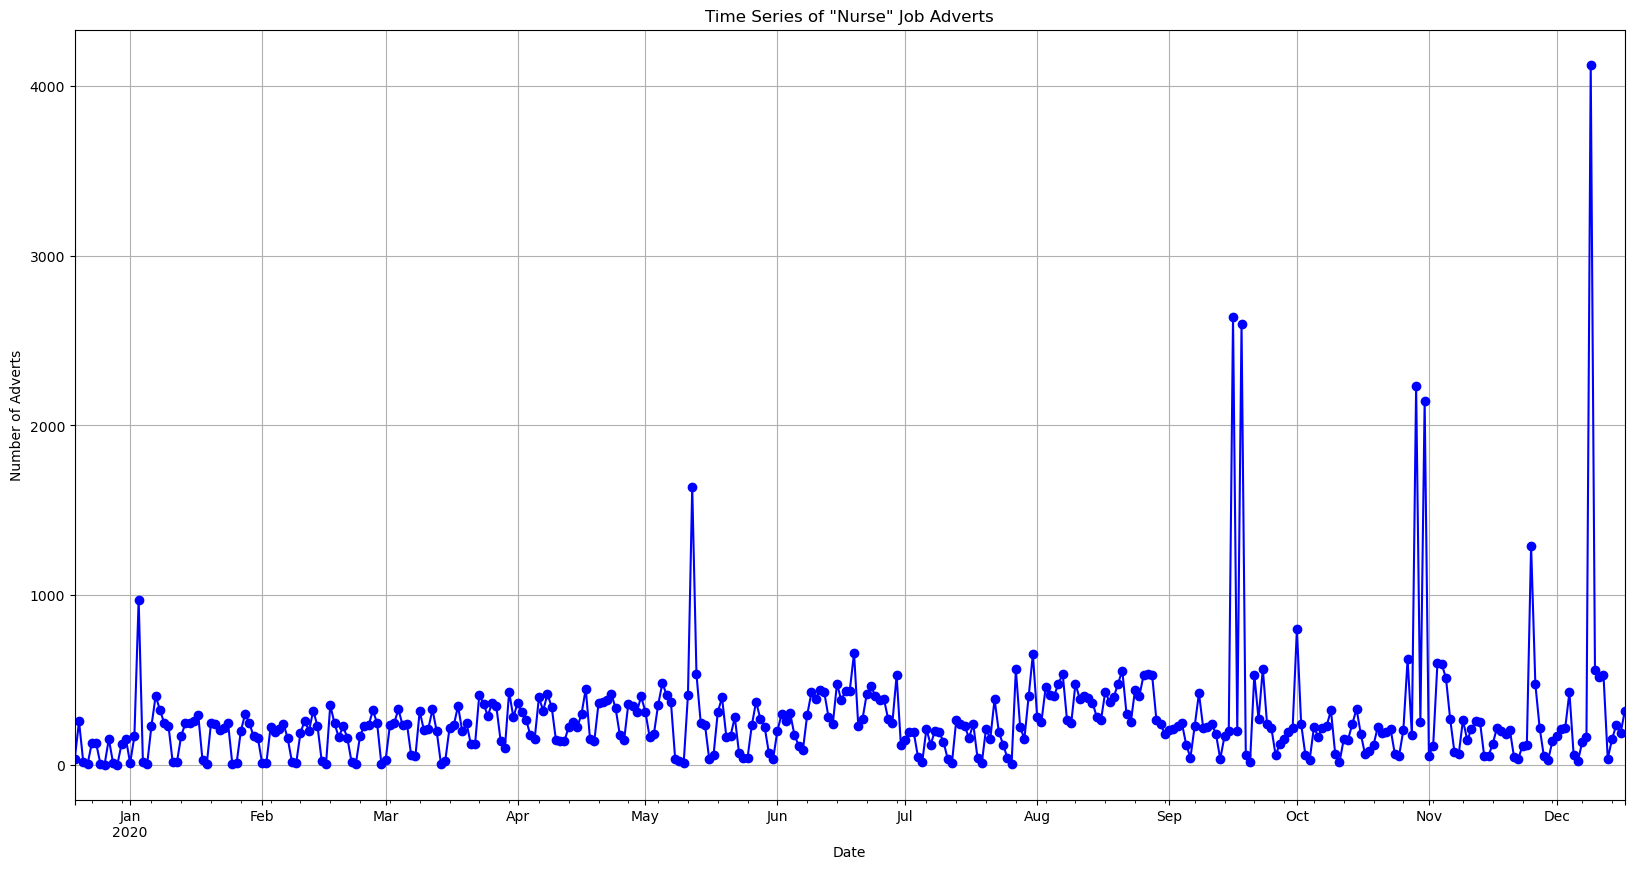

In [17]:
#2.3
# Convert 'datePosted' to datetime format

Employer_df['datePosted'] = pd.to_datetime(Employer_df['datePosted'], dayfirst=True)

# Filter DataFrame for job titles containing 'nurse' (case insensitive)
nurse_jobs = Employer_df[Employer_df['jobTitle'].str.contains('nurse', case=False, na=False)]

# Group by date and count the number of adverts each day
nurse_jobs_by_date = nurse_jobs['datePosted'].value_counts().sort_index()

# Plot
plt.figure(figsize=(20,10))
nurse_jobs_by_date.plot(kind='line', color='blue',marker="o")
plt.title('Time Series of "Nurse" Job Adverts')
plt.xlabel('Date')
plt.ylabel('Number of Adverts')
plt.grid()
plt.show()

In [18]:
job_df= pd.read_csv("JobDescription.csv", encoding="ISO-8859-1")
job_df.head()

datePosted                      jobTitle  \
0  19/12/2019        Customer Sales Advisor   
1  19/12/2019         General Radiographer    
2  19/12/2019     Client Support Executive    
3  19/12/2019  Electro Mechanical Inspector   
4  19/12/2019                  Audit Senior   

                                      jobDescription  
0   <p><strong>Every moment matters</strong><br /...  
1   <p>&#163;28,000 - &#163;33,000 p/a | FT or PT...  
2   <p><strong>A leading business based in Woking...  
3  Job: Electro Mechanical Inspector <br />Locati...  
4  Elevation Accountancy &amp; Finance are workin...

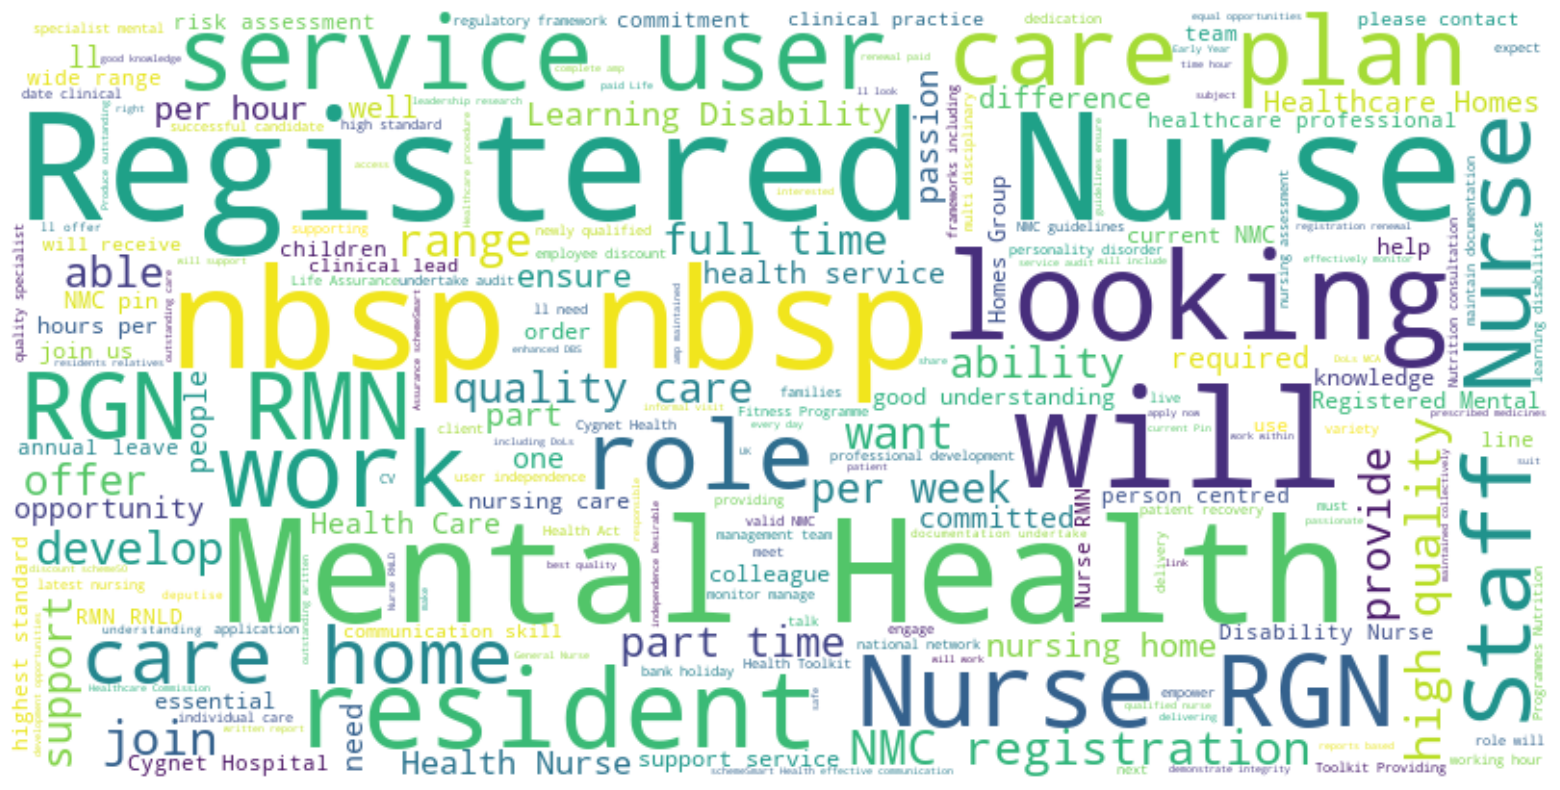

In [19]:
#2.4

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# convert 'datePosted' to datetime format
job_df['datePosted'] = pd.to_datetime(job_df['datePosted'], dayfirst=True)

# Filter DataFrame for job titles containing 'nurse' (case insensitive)
nurse_jobs = job_df[job_df['jobTitle'].str.contains('nurse', case=False, na=False)]

# Clean the job descriptions by removing HTML tags and combine all into one large text
nurse_descriptions = " ".join(re.sub('<.*?>', '', desc) for desc in nurse_jobs['jobDescription'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(nurse_descriptions)

# Display the generated image
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [20]:
location_df= pd.read_csv("Location.csv", encoding="ISO-8859-1")
location_df.tail(25)

locationName
1999982              Tamworth
1999983  Kingston Upon Thames
1999984                Bexley
1999985         Staffordshire
1999986        Stoke-on-Trent
1999987              Coventry
1999988                Merton
1999989                Harrow
1999990           South Brent
1999991        Norton Lindsey
1999992        Leicestershire
1999993              Haringey
1999994             Islington
1999995                Boston
1999996               Chelsea
1999997             Cambridge
1999998               Ipswich
1999999               Enfield
2000000                 Blaby
2000001            St. Albans
2000002         Hatfield Hyde
2000003     Market Harborough
2000004            Dale Abbey
2000005               Watford
2000006            Derbyshire

In [21]:
city_counts = location_df['locationName'].value_counts()
city_counts_df = pd.DataFrame({'City': city_counts.index, 'Count': city_counts.values})

In [22]:
city_counts_df

City   Count
0                 London  190635
1             Manchester   43305
2             Birmingham   32575
3                Bristol   29841
4                  Leeds   27906
...                  ...     ...
11773      Knatts Valley       1
11774    Hampton Hargate       1
11775              Ellel       1
11776          Mattersey       1
11777  Lower Pond Street       1

[11778 rows x 2 columns]

In [23]:
import geopandas as gpd
import pandas as pd
import numpy as np
import plotly.express as px

# Load the GeoJSON file of UK counties
uk_counties_geojson_path = "C:\\Users\\Sencha\\Desktop\\County Data-20230704\\Counties_and_Unitary_Authorities_(December_2021)_UK_BUC.geojson"
uk_counties = gpd.read_file(uk_counties_geojson_path)

# Assuming city_counts_df is your dataset containing city counts
# Rename the columns to match the GeoDataFrame for merging
ads_data = city_counts_df.rename(columns={'City': 'CTYUA21NM', 'Count': 'number_of_ads'})

# Merge the GeoDataFrame with the ads data using county codes
merged_data = uk_counties.merge(ads_data, on='CTYUA21NM', how='left')
merged_data['log_number_of_ads'] = np.log1p(merged_data['number_of_ads'])

# Create the impressive plot using Plotly Express
fig = px.choropleth_mapbox(
    merged_data,
    geojson=merged_data.geometry,
    locations=merged_data.index,
    color='log_number_of_ads',
    color_continuous_scale='Inferno',
    hover_name='CTYUA21NM',
    hover_data={'log_number_of_ads': True, 'CTYUA21NM': False},
    mapbox_style="carto-positron",
    center={"lat": 53.5, "lon": -2.5},  # Center of the UK
    zoom=5.5,  # Adjust the zoom level to fit the UK
    opacity=0.7,
    labels={'log_number_of_ads': 'Number of Ads(Log Scale)'}
)

fig.update_layout(
    title_text='Number of Ads per County in the UK',
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
)

fig.show()